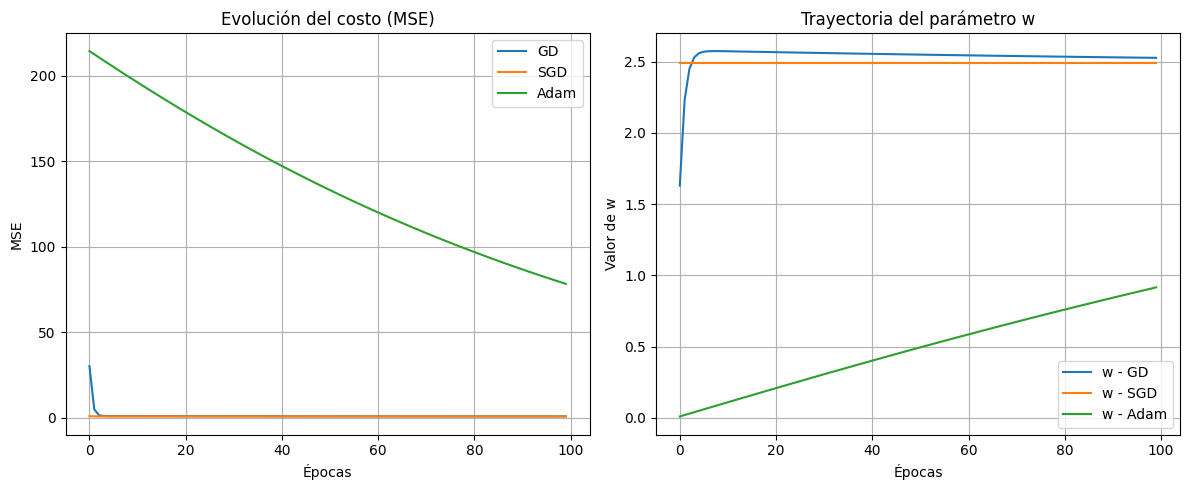

Resultados finales:
GD -> w: 2.5262, b: 0.7457
SGD -> w: 2.4871, b: 1.1095
Adam -> w: 0.9156, b: 0.9132


In [2]:
# importacion de las librerias necesarias:

import numpy as np
import matplotlib.pyplot as plt

# 1.- Generación de datos sintéticos

np.random.seed(42)
n = 100
x = np.random.uniform(0, 10, size=(n, 1))
true_w = 2.5
true_b = 1.0
noise = np.random.normal(0, 1, size=(n, 1))
y = true_w * x + true_b + noise

# 2.- Función de costo y gradiente

def mse(y_true, y_pred):
    """
    Calcula el error cuadrático medio entre etiquetas reales y predicciones.
    """
    return np.mean((y_true - y_pred) ** 2)

def gradiente(x, y, w, b):
    """
    Calcula el gradiente de la función de costo con respecto a w y b (GD).
    """
    n = len(x)
    y_pred = w * x + b
    error = y_pred - y
    dw = (2/n) * np.sum(x * error)
    db = (2/n) * np.sum(error)
    return dw, db

# 3. Descenso de Gradiente Básico (GD)

def entrenamiento_gd(x, y, lr=0.01, epochs=100):
    w, b = 0.0, 0.0
    costos = []
    tray_w, tray_b = [], []

    for epoch in range(epochs):
        dw, db = gradiente(x, y, w, b)
        w -= lr * dw
        b -= lr * db
        costos.append(mse(y, w * x + b))
        tray_w.append(w)
        tray_b.append(b)

    return w, b, costos, tray_w, tray_b

# 4. Descenso de Gradiente Estocástico (SGD)

def entrenamiento_sgd(x, y, lr=0.01, epochs=100):
    w, b = 0.0, 0.0
    costos = []
    tray_w, tray_b = [], []

    for epoch in range(epochs):
        for i in range(len(x)):
            xi = x[i]
            yi = y[i]
            y_pred = w * xi + b
            error = y_pred - yi
            dw = 2 * xi * error
            db = 2 * error
            w -= lr * dw
            b -= lr * db

        costos.append(mse(y, w * x + b))
        tray_w.append(w)
        tray_b.append(b)

    return w, b, costos, tray_w, tray_b

# 5. Descenso con Adam

def entrenamiento_adam(x, y, lr=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w, b = 0.0, 0.0
    mw, mb = 0, 0
    vw, vb = 0, 0
    costos = []
    tray_w, tray_b = [], []

    for t in range(1, epochs + 1):
        dw, db = gradiente(x, y, w, b)

        mw = beta1 * mw + (1 - beta1) * dw
        mb = beta1 * mb + (1 - beta1) * db

        vw = beta2 * vw + (1 - beta2) * (dw ** 2)
        vb = beta2 * vb + (1 - beta2) * (db ** 2)

        # Corrección de sesgo
        mw_corr = mw / (1 - beta1 ** t)
        mb_corr = mb / (1 - beta1 ** t)
        vw_corr = vw / (1 - beta2 ** t)
        vb_corr = vb / (1 - beta2 ** t)

        w -= lr * mw_corr / (np.sqrt(vw_corr) + epsilon)
        b -= lr * mb_corr / (np.sqrt(vb_corr) + epsilon)

        costos.append(mse(y, w * x + b))
        tray_w.append(w)
        tray_b.append(b)

    return w, b, costos, tray_w, tray_b

# 6. Entrenamiento y comparación

# Ejecutar los métodos
w_gd, b_gd, c_gd, tw_gd, tb_gd = entrenamiento_gd(x, y, lr=0.01, epochs=100)
w_sgd, b_sgd, c_sgd, tw_sgd, tb_sgd = entrenamiento_sgd(x, y, lr=0.01, epochs=100)
w_adam, b_adam, c_adam, tw_adam, tb_adam = entrenamiento_adam(x, y, lr=0.01, epochs=100)

# 7. Visualización de resultados

plt.figure(figsize=(12, 5))

# Comparación de costos
plt.subplot(1, 2, 1)
plt.plot(c_gd, label="GD")
plt.plot(c_sgd, label="SGD")
plt.plot(c_adam, label="Adam")
plt.title("Evolución del costo (MSE)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

# Trayectoria de w
plt.subplot(1, 2, 2)
plt.plot(tw_gd, label="w - GD")
plt.plot(tw_sgd, label="w - SGD")
plt.plot(tw_adam, label="w - Adam")
plt.title("Trayectoria del parámetro w")
plt.xlabel("Épocas")
plt.ylabel("Valor de w")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# imprimir los resultados finales
print("Resultados finales:")
print(f"GD -> w: {w_gd:.4f}, b: {b_gd:.4f}")
print(f"SGD -> w: {w_sgd.item():.4f}, b: {b_sgd.item():.4f}")
print(f"Adam -> w: {w_adam.item():.4f}, b: {b_adam.item():.4f}")

# Comparación de Métodos de Optimización en Regresión Lineal

Esta actividad tuvo como objetivo comparar diferentes métodos de optimización para minimizar una función de costo en un modelo de regresión lineal. Se analizaron tres enfoques: descenso de gradiente básico (GD), descenso de gradiente estocástico (SGD) y el optimizador adaptativo Adam.

## Generación de datos

Se generó un conjunto de datos sintéticos que sigue un modelo lineal del tipo:  
**y = 2.5 * x + 1.0 + ε**,  
donde **ε** representa ruido gaussiano. Se utilizaron 100 muestras con valores de **x** distribuidos uniformemente en el intervalo [0, 10]. Se estableció una semilla fija para garantizar la reproducibilidad.

## Función de costo y gradiente

Se utilizó el **error cuadrático medio (MSE)** como función de costo, una medida estándar en problemas de regresión. Se derivaron expresiones para calcular el gradiente de la función de costo respecto a los parámetros del modelo: la pendiente **w** y el sesgo **b**.

## Implementación de métodos de optimización

Se implementaron tres algoritmos:

- **Descenso de Gradiente (GD):** actualiza los parámetros utilizando el conjunto completo de datos en cada iteración.
- **Descenso de Gradiente Estocástico (SGD):** actualiza los parámetros utilizando una muestra a la vez.
- **Adam:** emplea un enfoque adaptativo que ajusta dinámicamente la tasa de aprendizaje utilizando momentos del gradiente.

Cada método se ejecutó durante 100 iteraciones, con tasa de aprendizaje constante.

## Visualización y análisis

Se graficó la evolución del MSE a lo largo de las épocas para cada método. Además, se visualizó la trayectoria del parámetro **w** durante el entrenamiento, lo que permitió comparar la estabilidad y velocidad de convergencia.

Los valores finales de los parámetros obtenidos por cada método se compararon con los valores reales del modelo generador. Las diferencias observadas se explican por el tipo de actualización y las características propias de cada optimizador.

## Conclusión

La actividad permitió observar cómo los distintos métodos de optimización afectan la eficiencia del entrenamiento y la precisión del modelo. En el contexto del aprendizaje automático, elegir correctamente el algoritmo de optimización y ajustar sus hiperparámetros es esencial para lograr buenos resultados, especialmente en modelos complejos como las redes neuronales.